In [1]:
# This code tests popular machine learning methodes with the red wine dataset

%matplotlib inline


# import needed libraries 

import numpy as np
import pandas as pd
from sklearn import tree

from sklearn.decomposition import RandomizedPCA 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV    
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# read the wineQualityReds.csv and get a general idea of the data structure

raw_data = pd.read_csv('wineQualityReds.csv')
print list(raw_data.columns.values)

# check if any NaN existes (missing data)

print raw_data.isnull().any()

['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Unnamed: 0              False
fixed.acidity           False
volatile.acidity        False
citric.acid             False
residual.sugar          False
chlorides               False
free.sulfur.dioxide     False
total.sulfur.dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


13 columns, no NaN.

In [3]:
# 'Unnamed' is observation seriers, so it is removed from the raw data

raw_data.drop(raw_data.columns[0],1, inplace=True)

# set "quality" as label/target
raw_labels = raw_data[raw_data.columns[11]]
# set 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 
#'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
# as features
raw_features = raw_data[raw_data.columns[0:11]]

# print raw_labels[:3]
# print raw_features[:3] 

In [4]:
# a quick statistic analysis of the freatures

print raw_features.describe()
 

       fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Features scaling may be needed.

In [5]:
#convert feature/label from pandas dataframe to numpy array

features = raw_features.as_matrix()
labels = raw_labels.as_matrix()


In [6]:
#data scaling with Min-Max method

min_max_scaler = preprocessing.MinMaxScaler()
features_mm = min_max_scaler.fit_transform(features)
# print features_mm[:10]

In [7]:
#data scaling with Z-score method 


Z_scaler = preprocessing.StandardScaler()

features_z = Z_scaler.fit_transform(features)
# print features_z[:10]

In clustering analyses, standardization (Z-score) may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix

Three dataset: 
non-scaling: features 
Z-score scaling: features_z
Min-Max scaling: features_mm

In [8]:
# Principal component analysis, use 6 components

n_components = 6

print "RandomizedPCA with %d components for non-standardized datasets"  % n_components   

pca = RandomizedPCA(n_components=n_components, whiten=True).fit(features)

#Percentage of variance explained by each of the selected components
print "Percentage of variance explained by each of the selected components, for non-scaling dataset:"
for i in range(0, n_components):
    print pca.explained_variance_ratio_[i]


RandomizedPCA with 6 components for non-standardized datasets
Percentage of variance explained by each of the selected components, for non-scaling dataset:
0.946576976395
0.0483683045748
0.00258917182866
0.00151896798439
0.000873553989634
3.45607218173e-05


In [9]:
# Principal component analysis

n_components = 6

print "RandomizedPCA with %d components for Z-standardized datasets, for Z-score scaling dataset:"  % n_components   

pca_z = RandomizedPCA(n_components=n_components, whiten=True).fit(features_z)

#Percentage of variance explained by each of the selected components
print "Percentage of variance explained by each of the selected components"
for i in range(0, n_components):
    print pca_z.explained_variance_ratio_[i]

RandomizedPCA with 6 components for Z-standardized datasets, for Z-score scaling dataset:
Percentage of variance explained by each of the selected components
0.281739312788
0.175082699055
0.14095849898
0.110293866416
0.0872083701224
0.0599643877154


In [10]:
# Principal component analysis

n_components = 6

print "RandomizedPCA with %d components for Min-Max-standardized datasets, for Min-Max scaling dataset: "  % n_components   

pca_mm = RandomizedPCA(n_components=n_components, whiten=True).fit(features_mm)

#Percentage of variance explained by each of the selected components
print "Percentage of variance explained by each of the selected components"
for i in range(0, n_components):
    print pca_mm.explained_variance_ratio_[i]

RandomizedPCA with 6 components for Min-Max-standardized datasets, for Min-Max scaling dataset: 
Percentage of variance explained by each of the selected components
0.35752287116
0.194253298645
0.150463216119
0.0723214158694
0.0532432877434
0.0516523537739


Scaling has heavy impact on PCA.

In [11]:
#PCA transform  

#non-standardized datasets
features_pca = pca.transform(features)
 

#Z-standardized datasets
features_pca_z = pca_z.transform(features_z)
 
#mm-standardized datasets
features_pca_mm = pca_mm.transform(features_mm)
 
print "Done PCA transform"  


Done PCA transform


In [12]:
#split data to train/test set, the test set contain 20% of all data

#Without PCA
# non-standardized datasets
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.2, random_state=20)

# Z-standardized datasets
features_train_z, features_test_z, labels_train_z, labels_test_z = cross_validation.train_test_split(features_z, labels, test_size=0.2, random_state=20)

# MM-standardized datasets
features_train_mm, features_test_mm, labels_train_mm, labels_test_mm = cross_validation.train_test_split(features_mm, labels, test_size=0.2, random_state=20)


#With PCA
# non-standardized datasets
features_train_pca, features_test_pca, labels_train, labels_test = cross_validation.train_test_split(features_pca, labels, test_size=0.2, random_state=20)

# Z-standardized datasets
features_train_z_pca, features_test_z_pca, labels_train_z, labels_test_z = cross_validation.train_test_split(features_pca_z, labels, test_size=0.2, random_state=20)

# MM-standardized datasets
features_train_mm_pca, features_test_mm_pca, labels_train_mm, labels_test_mm = cross_validation.train_test_split(features_pca_mm, labels, test_size=0.2, random_state=20)


Now there are 6 dataset:

features_train, features_test
features_train_pca, features_test_pca
features_train_z, features_test_z
features_train_z_pca, features_test_z_pca
features_train_mm, features_test_mm
features_train_mm_pca, features_test_mm_pca


C:\Users\hu_ac\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


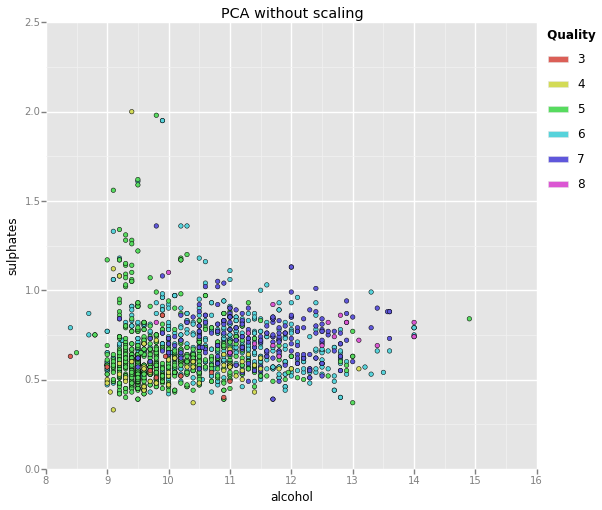

<ggplot: (34188229)>


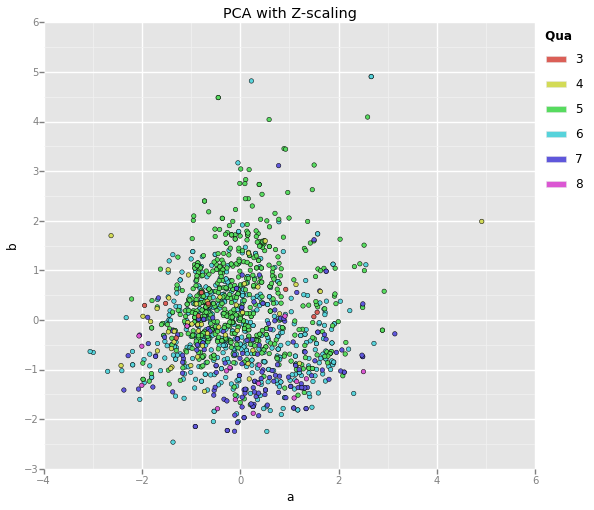

<ggplot: (34188250)>


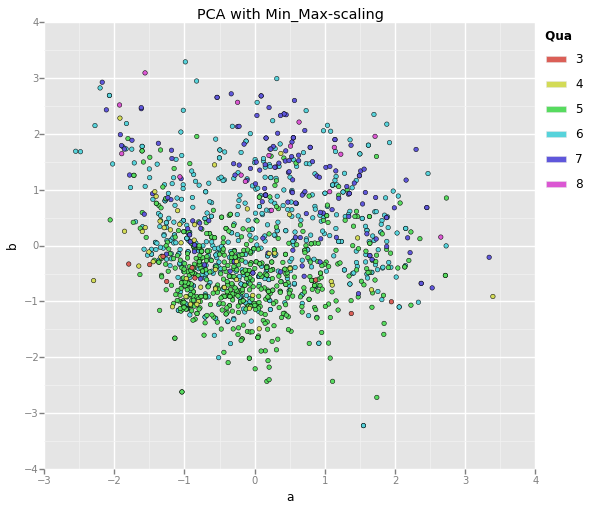

<ggplot: (34191932)>


In [13]:
#Visulazition of PCA results
#print features_train_pca 
from matplotlib import pyplot as plt

# print features_train_pca[:,0]
la = pd.DataFrame(labels_train.astype(int)) 

#ta = list(features_train[:,0])

ta = pd.DataFrame(features_train_pca)
ta_z = pd.DataFrame(features_train_z_pca)
ta_mm = pd.DataFrame(features_train_mm_pca)
 
ta_z.columns=['a',  'b','c','d','e','f']  
ta_mm.columns=['a',  'b','c','d','e','f']
la.columns = ['qua']
ta_z['qua'] = la['qua']
ta_mm['qua'] = la['qua']



from ggplot import *

# temp.plot(kind='scatter', x='com', y='qua')
p1 = ggplot(aes(x = 'alcohol', y = 'sulphates', fill = 'quality'), data = raw_data) + \
     geom_point()+\
     scale_color_gradient(low='green',high='blue')+\
     ggtitle("PCA without scaling")
p2 = ggplot(aes(x = 'a', y = 'b', fill = 'qua'), data = ta_z) + geom_point()+\
     scale_color_gradient(low='green',high='blue')+\
     ggtitle("PCA with Z-scaling")
p3 = ggplot(aes(x = 'a', y = 'b', fill = 'qua'), data = ta_mm) + geom_point()+\
     scale_color_gradient(low='green',high='blue')+\
     ggtitle("PCA with Min_Max-scaling")
print p1
print p2
print p3
# temp_mm.plot(kind='scatter', x='com', y='qua')

Scaling and PCA have some helps for spots seperation. 

In [16]:
# ml analysis methods

def performance(x_train, y_train, x_test, y_test):
    # fit the model
    
    search_methods = {'Decision Tree':{'param_grid':{'min_samples_split': [5, 10, 20, 40, 80, 160]}},
                      'k-nn'         :{'param_grid':{'n_neighbors': [1, 5, 10]}},
                      'SVM_linear'   :{'param_grid':{'C': [1, 2, 4, 8]}},
                      'SVM_rbf'      :{'param_grid':{'gamma': [0, 0.01, 0.1, 1], 'C': [1, 10, 20, 40, 80]}},
                      'SVM_poly'     :{'param_grid':{'degree': [2, 5], 'C': [1, 25, 50], 'coef0': [0, 0.5, 1]}},
                      'naive-bayes'  :{'param_grid': None},
                      'random-forest':{'param_grid':{'n_estimators': [10, 30]}},
                      'Adaboost'     :{'param_grid':{'n_estimators': [5, 10,20, 40, 80]}}
                }
    #report = defaultdict(classification_report)
    report = {}
    for algorithm, para in search_methods.iteritems():
        if algorithm == 'Decision Tree':
            clf = GridSearchCV(tree.DecisionTreeClassifier(), para.values())
            report["Decision Tree result"] = perform_ml(clf, x_train, y_train, x_test, y_test)
            print "Decision Tree done!"
        elif algorithm == 'k-nn':
            clf =GridSearchCV(KNeighborsClassifier(),para.values())
            report["k-nn result"] = perform_ml(clf, x_train, y_train, x_test, y_test)
            print "k-nn done!"
        elif algorithm == 'SVM_linear':
            clf = GridSearchCV(SVC(kernel='linear', class_weight='auto'), para.values())
            report["SVM_linear"] = perform_ml(clf, x_train, y_train, x_test, y_test)
            print "SVM_linear done!"
        elif algorithm == 'SVM_rbf':
            clf = GridSearchCV(SVC(kernel='rbf', class_weight='auto'), para.values())
            report["SVM_rbf"] = perform_ml(clf, x_train, y_train, x_test, y_test)
            print "SVM_rbf done!"
        elif algorithm == 'SVM_poly':
            clf = GridSearchCV(SVC(kernel='poly', class_weight='auto'), para.values())
            report["SVM_poly"] = perform_ml(clf, x_train, y_train, x_test, y_test)         
            print "SVM_poly done!"
        elif algorithm == 'naive-bayes':
            clf =GaussianNB() 
            report["naive-bayes"] = perform_ml(clf, x_train, y_train, x_test, y_test)
            print "naive-bayes done!"
        elif algorithm == 'random-forest':
            clf =GridSearchCV(RandomForestClassifier(), para.values())
            report["random-forest"] = perform_ml(clf, x_train, y_train, x_test, y_test)
            print "random-forest done!"
#         else:
#             print ""
        # predict the test set
    print "All done!"
    return report
 
def perform_ml(clf, x_train, y_train, x_test, y_test ) :
    
    clf = clf.fit(x_train, y_train)     
    pred = clf.predict(x_test)
    c_r = classification_report(y_test, pred)
    c_m = confusion_matrix(y_test, pred)         
    
    return [c_r, c_m]

def result_analysis(orig):
    
    temp_score = {}
    for k, v in orig.iteritems():
        score = v[0].split('avg / total')[1].split()[0:3]
        temp_score[k] = score

    all_score = pd.DataFrame.from_dict(temp_score) 
    all_score = all_score.transpose()

    all_score.columns = ['precision','recall','f1-score']
    print all_score

    here_max = all_score["f1-score"].idxmax(axis=1)
    print "The method %s gave the best result!" % here_max

    print "The confusion matrix of %s is: " % here_max
    print orig[here_max][1]
    
    return "Analysis Done!"

In [15]:
#6 dataset:

#features_train, features_test 
#features_train_pca, features_test_pca 
#features_train_z, features_test_z 
#features_train_z_pca, features_test_z_pca 
#features_train_mm, features_test_mm 
#features_train_mm_pca, features_test_mm_pca

#for orininal data, SVC_poly doesnt work.
orig = performance(features_train, labels_train, features_test, labels_test)
print result_analysis(orig)

random-forest done!
SVM_linear done!
k-nn done!

Decision Tree done!
naive-bayes done!
SVM_rbf done!

All done!
                     precision recall f1-score
Decision Tree result      0.58   0.58     0.57
SVM_linear                0.56   0.37     0.44
SVM_rbf                   0.58   0.56     0.52
k-nn result               0.55   0.54     0.54
naive-bayes               0.55   0.54     0.54
random-forest             0.67   0.69     0.68
The method random-forest gave the best result!
The confusion matrix of random-forest is: 
[[  0   0   1   0   0   0]
 [  0   0   5   2   0   0]
 [  0   0 108  22   0   0]
 [  0   1  36  89  10   0]
 [  0   0   1  18  25   0]
 [  0   0   0   2   0   0]]
Analysis Done!


C:\Users\hu_ac\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:

orig = performance(features_train_pca, labels_train, features_test_pca, labels_test)
print result_analysis(orig)

random-forest done!
SVM_linear done!
k-nn done!
Decision Tree done!
naive-bayes done!
SVM_rbf done!
SVM_poly done!
All done!
                     precision recall f1-score
Decision Tree result      0.57   0.59     0.58
SVM_linear                0.55   0.34     0.41
SVM_poly                  0.59   0.56     0.57
SVM_rbf                   0.63   0.62     0.61
k-nn result               0.66   0.65     0.65
naive-bayes               0.57   0.58     0.56
random-forest             0.66   0.68     0.67
The method random-forest gave the best result!
The confusion matrix of random-forest is: 
[[  0   0   1   0   0   0]
 [  0   0   4   3   0   0]
 [  0   1 108  20   1   0]
 [  0   0  41  86   9   0]
 [  0   0   2  18  24   0]
 [  0   0   2   0   0   0]]
Analysis Done!


In [18]:

orig = performance(features_train_z, labels_train, features_test_z, labels_test)
print result_analysis(orig)

random-forest done!
SVM_linear done!
k-nn done!
Decision Tree done!
naive-bayes done!
SVM_rbf done!
SVM_poly done!
All done!
                     precision recall f1-score
Decision Tree result      0.58   0.58     0.57
SVM_linear                0.52   0.38     0.43
SVM_poly                  0.62   0.58     0.59
SVM_rbf                   0.61   0.62     0.61
k-nn result               0.65   0.63     0.64
naive-bayes               0.55   0.54     0.54
random-forest             0.70   0.72     0.70
The method random-forest gave the best result!
The confusion matrix of random-forest is: 
[[  0   0   1   0   0   0]
 [  0   0   4   3   0   0]
 [  0   1 111  16   2   0]
 [  0   0  35  94   7   0]
 [  0   0   4  15  25   0]
 [  0   0   0   2   0   0]]
Analysis Done!


In [19]:
orig = performance(features_train_z_pca, labels_train, features_test_z_pca, labels_test)
print result_analysis(orig)

random-forest done!
SVM_linear done!
k-nn done!
Decision Tree done!
naive-bayes done!
SVM_rbf done!
SVM_poly done!
All done!
                     precision recall f1-score
Decision Tree result      0.58   0.57     0.57
SVM_linear                0.55   0.32     0.39
SVM_poly                  0.61   0.55     0.57
SVM_rbf                   0.59   0.59     0.59
k-nn result               0.63   0.62     0.62
naive-bayes               0.54   0.53     0.53
random-forest             0.63   0.65     0.64
The method random-forest gave the best result!
The confusion matrix of random-forest is: 
[[  0   0   1   0   0   0]
 [  0   0   5   2   0   0]
 [  0   0 100  28   2   0]
 [  0   1  38  84  13   0]
 [  0   0   2  17  25   0]
 [  0   0   0   2   0   0]]
Analysis Done!


In [20]:
orig = performance(features_train_mm, labels_train, features_test_mm, labels_test)
print result_analysis(orig)

random-forest done!
SVM_linear done!
k-nn done!
Decision Tree done!
naive-bayes done!
SVM_rbf done!
SVM_poly done!
All done!
                     precision recall f1-score
Decision Tree result      0.58   0.58     0.57
SVM_linear                0.56   0.34     0.41
SVM_poly                  0.52   0.38     0.43
SVM_rbf                   0.55   0.47     0.50
k-nn result               0.64   0.62     0.63
naive-bayes               0.55   0.54     0.54
random-forest             0.66   0.68     0.66
The method random-forest gave the best result!
The confusion matrix of random-forest is: 
[[  0   0   1   0   0   0]
 [  0   0   4   3   0   0]
 [  0   0 104  24   2   0]
 [  0   2  35  87  12   0]
 [  0   0   2  17  25   0]
 [  0   0   0   0   2   0]]
Analysis Done!


In [21]:
orig = performance(features_train_mm_pca, labels_train, features_test_mm_pca, labels_test)
print result_analysis(orig)

random-forest done!
SVM_linear done!
k-nn done!
Decision Tree done!
naive-bayes done!
SVM_rbf done!
SVM_poly done!
All done!
                     precision recall f1-score
Decision Tree result      0.59   0.58     0.59
SVM_linear                0.58   0.33     0.38
SVM_poly                  0.60   0.54     0.56
SVM_rbf                   0.61   0.61     0.61
k-nn result               0.58   0.58     0.58
naive-bayes               0.55   0.54     0.54
random-forest             0.65   0.67     0.65
The method random-forest gave the best result!
The confusion matrix of random-forest is: 
[[  0   0   1   0   0   0]
 [  0   0   6   1   0   0]
 [  0   1 102  27   0   0]
 [  0   1  35  89  11   0]
 [  0   0   2  20  22   0]
 [  0   0   0   2   0   0]]
Analysis Done!
